### Epidemic forecasting datasets

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from moment.common import PATHS
from moment.data.load_data import convert_tsf_to_dataframe
from moment.data.forecasting_datasets import \
    get_forecasting_datasets, filter_epidemic_datasets, EpidemicForecastingDataset

In [2]:
forecasting_datasets = get_forecasting_datasets(collection="epidemic/preprocessed")
forecasting_datasets = filter_epidemic_datasets(
    forecasting_datasets,
    dataset_name="EU-Flu",
    indicator="Daily"
)
print(f"Number of forecasting datasets:", len(forecasting_datasets))

Number of forecasting datasets: 48


In [3]:
forecasting_datasets[:5]

['/XXXX-14/project/public/XXXX-9/TimeseriesDatasets/forecasting/epidemic/preprocessed/EU-Flu_Ireland_Daily_hospital_occupancy.csv',
 '/XXXX-14/project/public/XXXX-9/TimeseriesDatasets/forecasting/epidemic/preprocessed/EU-Flu_Finland_Daily_hospital_occupancy.csv',
 '/XXXX-14/project/public/XXXX-9/TimeseriesDatasets/forecasting/epidemic/preprocessed/EU-Flu_Poland_Daily_hospital_occupancy.csv',
 '/XXXX-14/project/public/XXXX-9/TimeseriesDatasets/forecasting/epidemic/preprocessed/EU-Flu_Finland_Daily_ICU_occupancy.csv',
 '/XXXX-14/project/public/XXXX-9/TimeseriesDatasets/forecasting/epidemic/preprocessed/EU-Flu_Denmark_Daily_hospital_occupancy.csv']

In [4]:
dataset = EpidemicForecastingDataset(
    full_file_path_and_name=forecasting_datasets[0],
    seq_len=64,
    pred_len=8,
    data_split='train', 
    target_col='value',
    scale=True,
    stride_len=1, 
    task='forecasting',
    train_ratio= 0.6, 
    val_ratio= 0.1, 
    test_ratio= 0.3,
    output_type='univariate'
)

In [5]:
dataset

LongForecastingDataset(dataset_name=EU-Flu_Ireland_Daily_hospital_occupancy,length_timeseries=587,length_dataset=523,n_channels=1,seq_len=64,pred_len=8,data_split=train,target_col=value,scale=True,data_stride_len=1,task_name=forecasting,train_ratio=0.6,val_ratio=0.1,test_ratio=0.3,output_type=univariate)

In [6]:
dataset.data.shape

(587, 1)

In [7]:
dataset.__getitem__(0)

TimeseriesData(timeseries=array([[-0.79875375, -0.8013216 , -0.79875375, -0.77821097, -0.76280388,
        -0.73198971, -0.75253249, -0.7473968 , -0.73969326, -0.70374339,
        -0.6883363 , -0.63954719, -0.59332593, -0.50345126, -0.45723   ,
        -0.39046596, -0.28518421, -0.2312594 , -0.10029917,  0.00498259,
         0.13080713,  0.29001369,  0.47233087,  0.62126604,  0.68546224,
         0.8395331 ,  0.83696525,  0.96278979,  1.05009661,  0.9576541 ,
         1.28377076,  1.28120291,  1.30431354,  1.30688139,  1.27349937,
         1.35310265,  1.3453991 ,  1.38391682,  1.38391682,  1.41729884,
         1.35310265,  1.34283126,  1.2375495 ,  1.25038874,  1.26066013,
         1.14253913,  1.15281052,  1.060368  ,  1.06807155,  1.04496092,
         1.10145357,  1.13483559,  1.08861433,  1.10658926,  1.04496092,
         1.05523231,  0.96535764,  0.91143284,  0.88061866,  0.90116145,
         0.84210095,  0.7316835 ,  0.65721591,  0.53909492]]), forecast=array([[0.53909492, 0.5801

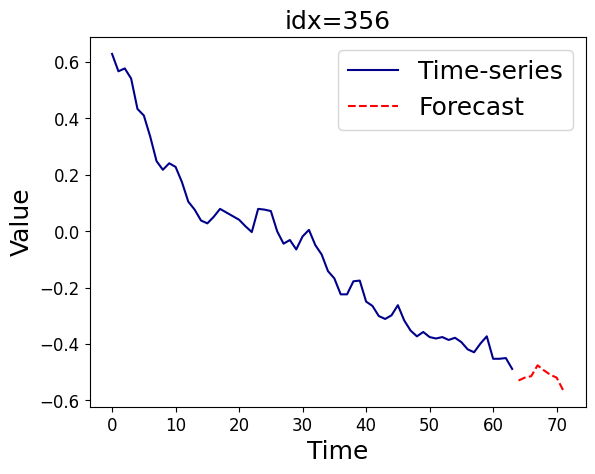

In [8]:
idx = np.random.randint(0, len(dataset))
dataset.plot(idx)

In [9]:
dataset[1]

TimeseriesData(timeseries=array([[-0.8013216 , -0.79875375, -0.77821097, -0.76280388, -0.73198971,
        -0.75253249, -0.7473968 , -0.73969326, -0.70374339, -0.6883363 ,
        -0.63954719, -0.59332593, -0.50345126, -0.45723   , -0.39046596,
        -0.28518421, -0.2312594 , -0.10029917,  0.00498259,  0.13080713,
         0.29001369,  0.47233087,  0.62126604,  0.68546224,  0.8395331 ,
         0.83696525,  0.96278979,  1.05009661,  0.9576541 ,  1.28377076,
         1.28120291,  1.30431354,  1.30688139,  1.27349937,  1.35310265,
         1.3453991 ,  1.38391682,  1.38391682,  1.41729884,  1.35310265,
         1.34283126,  1.2375495 ,  1.25038874,  1.26066013,  1.14253913,
         1.15281052,  1.060368  ,  1.06807155,  1.04496092,  1.10145357,
         1.13483559,  1.08861433,  1.10658926,  1.04496092,  1.05523231,
         0.96535764,  0.91143284,  0.88061866,  0.90116145,  0.84210095,
         0.7316835 ,  0.65721591,  0.53909492,  0.53909492]]), forecast=array([[0.58018048, 0.4697

In [10]:
forecasting_datasets = get_forecasting_datasets(collection="epidemic/preprocessed")
forecasting_datasets = filter_epidemic_datasets(
    forecasting_datasets, dataset_name="ILI-US"
)
print(f"Number of forecasting datasets:", len(forecasting_datasets))

Number of forecasting datasets: 11


In [11]:
forecasting_datasets[:5]

['/XXXX-14/project/public/XXXX-9/TimeseriesDatasets/forecasting/epidemic/preprocessed/ILI-US_Region_2_2003-2020.csv',
 '/XXXX-14/project/public/XXXX-9/TimeseriesDatasets/forecasting/epidemic/preprocessed/ILI-US_Region_7_2003-2020.csv',
 '/XXXX-14/project/public/XXXX-9/TimeseriesDatasets/forecasting/epidemic/preprocessed/ILI-US_Region_8_2003-2020.csv',
 '/XXXX-14/project/public/XXXX-9/TimeseriesDatasets/forecasting/epidemic/preprocessed/ILI-US_Region_10_2003-2020.csv',
 '/XXXX-14/project/public/XXXX-9/TimeseriesDatasets/forecasting/epidemic/preprocessed/ILI-US_Region_5_2003-2020.csv']

In [12]:
dataset = EpidemicForecastingDataset(
    full_file_path_and_name=forecasting_datasets[0],
    seq_len=53,
    pred_len=4,
    data_split='train', 
    target_col='% WEIGHTED ILI',
    scale=True,
    stride_len=1, 
    task='forecasting',
    train_ratio= 0.6, 
    val_ratio= 0.1, 
    test_ratio= 0.3,
    output_type='univariate'
)

In [13]:
dataset

LongForecastingDataset(dataset_name=ILI-US_Region_2_2003-2020,length_timeseries=541,length_dataset=488,n_channels=1,seq_len=53,pred_len=4,data_split=train,target_col=% WEIGHTED ILI,scale=True,data_stride_len=1,task_name=forecasting,train_ratio=0.6,val_ratio=0.1,test_ratio=0.3,output_type=univariate)

In [14]:
dataset.data.shape

(541, 1)

In [15]:
dataset.__getitem__(0)

TimeseriesData(timeseries=array([[ 0.15605499, -0.09348266,  0.78407878, -0.24940353, -0.20014499,
        -0.46325529, -0.83196221, -0.9036527 , -0.51883072, -0.83717467,
        -0.71289917, -0.9077418 , -0.92347636, -0.87459667, -0.54389402,
        -0.72648995, -0.7355189 , -0.61401312, -0.60008467, -0.5641616 ,
        -0.515034  , -0.25123189, -0.42614461, -0.44793663, -0.2846035 ,
        -0.30702969,  0.05021624,  0.17828351,  0.35910133,  0.95314405,
         2.17402461,  3.7490956 ,  3.92973223,  1.70291823,  0.65802105,
         0.1413046 , -0.04749374,  0.05978628, -0.3443298 , -0.13262759,
         0.11737949, -0.07100705, -0.39609203, -0.32995826, -0.33174544,
        -0.23942993, -0.05834857, -0.20902322, -0.46038098, -0.2722168 ,
        -0.51812244, -0.61317059, -0.52196858]]), forecast=array([[-0.30199759, -0.1668475 , -0.15703861, -0.17919302]]), labels=None, input_mask=array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 

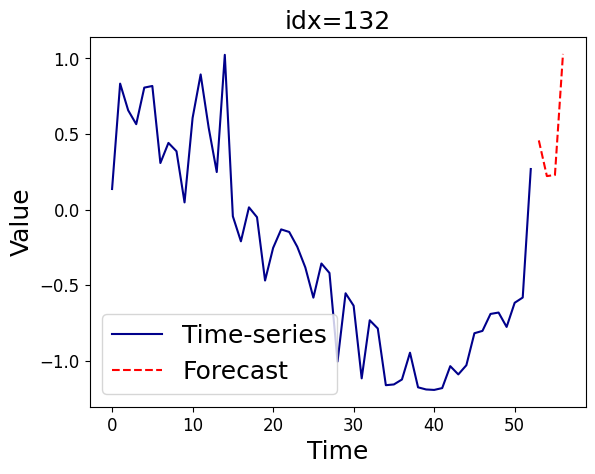

In [50]:
idx = np.random.randint(0, len(dataset))
dataset.plot(idx)

In [17]:
dataset[1]

TimeseriesData(timeseries=array([[-0.09348266,  0.78407878, -0.24940353, -0.20014499, -0.46325529,
        -0.83196221, -0.9036527 , -0.51883072, -0.83717467, -0.71289917,
        -0.9077418 , -0.92347636, -0.87459667, -0.54389402, -0.72648995,
        -0.7355189 , -0.61401312, -0.60008467, -0.5641616 , -0.515034  ,
        -0.25123189, -0.42614461, -0.44793663, -0.2846035 , -0.30702969,
         0.05021624,  0.17828351,  0.35910133,  0.95314405,  2.17402461,
         3.7490956 ,  3.92973223,  1.70291823,  0.65802105,  0.1413046 ,
        -0.04749374,  0.05978628, -0.3443298 , -0.13262759,  0.11737949,
        -0.07100705, -0.39609203, -0.32995826, -0.33174544, -0.23942993,
        -0.05834857, -0.20902322, -0.46038098, -0.2722168 , -0.51812244,
        -0.61317059, -0.52196858, -0.30199759]]), forecast=array([[-0.1668475 , -0.15703861, -0.17919302, -0.71122153]]), labels=None, input_mask=array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 